# Task 2.4 - Optimizing Hyperparameters - Random Forest for Heathrow data (all years)

## Table of Contents

#### 1. Importing Libraries and Data
- Cleaned weather observations from 2.2, pleasant weather (predictions)
#### 2. Data Wrangling
-  Reduce data to Heathrow for this script
#### 3. Reshaping for Modeling
#### 4. Data Split
#### 5. Hyperparameter Optimization
- Grid Search
- Random Search
#### 6. Running Random Forest with Optimized Search Parameters
#### 7.  Uncovering Feature Importances

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

2024-09-12 09:43:12.417250: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set a path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Machine Learning with Python/ClimateWins'

In [3]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [4]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, '02 Data', 'Original', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [6]:
X.shape

(22950, 137)

In [7]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
answers.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to one station only. For this script: Heathrow.

In [9]:
# Create a list of the columns containing "Heathrow" in their names

heathrow_list = list(x for x in X.columns if x.find('HEATHROW') >=0)
heathrow_list

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [10]:
# Create a dataframe with those columns

df_heathrow = X[heathrow_list]
df_heathrow

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [11]:
# Reduce answers dataset to Heathrow's answers only

answers_heathrow = answers['HEATHROW_pleasant_weather']
answers_heathrow

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

In [12]:
df_heathrow.shape # observations dataset has the correct shape

(22950, 9)

In [13]:
answers_heathrow.shape # predictions dataset has the correct shape

(22950,)

## 3. Reshaping for Modeling

In [14]:
X2 = df_heathrow

In [15]:
y2 = answers_heathrow

In [16]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [17]:
X.shape

(22950, 9)

In [18]:
y.shape

(22950,)

## 4. Data Split 

In [19]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [20]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [21]:
X_train

array([[ 7.    ,  0.77  ,  1.0144, ..., 15.8   , 12.5   , 20.3   ],
       [ 3.    ,  0.71  ,  1.0171, ...,  1.3   , -2.7   ,  7.    ],
       [ 3.    ,  0.81  ,  1.0116, ..., -2.8   , -5.7   ,  0.8   ],
       ...,
       [ 8.    ,  0.9   ,  1.0115, ...,  8.3   ,  6.8   , 12.4   ],
       [ 6.    ,  0.83  ,  1.0121, ..., 11.6   ,  8.1   , 16.8   ],
       [ 2.    ,  0.59  ,  1.0257, ...,  9.2   ,  4.2   , 11.8   ]])

In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
X_test

array([[ 3.    ,  0.61  ,  1.0171, ..., 13.6   ,  8.2   , 18.1   ],
       [ 7.    ,  0.88  ,  0.9977, ...,  5.9   ,  0.8   , 11.1   ],
       [ 7.    ,  0.7   ,  1.0043, ..., 19.4   , 14.6   , 24.6   ],
       ...,
       [ 6.    ,  0.85  ,  1.0095, ..., 15.4   , 12.1   , 21.7   ],
       [ 5.    ,  0.72  ,  1.0264, ...,  8.7   ,  2.9   , 15.    ],
       [ 4.    ,  0.58  ,  1.022 , ..., 14.2   ,  9.9   , 18.6   ]])

In [24]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

## 5. Hyperparameter Optimization

### Grid Search

In [25]:
# Create a RF classifier

clf = RandomForestClassifier()

In [26]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [27]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.965 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.947 total time=   2.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.954 total time=   1.0s
[CV 3/3] END ma

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.952 total time=   1.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.952 total time=   2.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.952 total time=   1.6s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.960 total time=   0.7s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.950 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=0.976 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.960 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.954 total time=   1.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.957 total time=   2.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.949 total time=   1.6s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.958 total time=   1.4s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.950 total time=   0.8s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_sample

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.957 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.950 total time=   1.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.925 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.922 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split

[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.1s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   2.6s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=1.000 total time=   2.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.1s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_sampl

[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=

Search took 3.760380200544993 minutes


In [28]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


### Random Search

In [29]:
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [30]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [31]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.9s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   0.9s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.999 total time=   0.1s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.998 total time=   0.1s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] EN

[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_sp

[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.0s
[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=1.000 total time=   1.9s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=1.000 total time=   2.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samp

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples

[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.4s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3, min_sa

[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 2/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.1s
[CV 1/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.0s
[CV 3/3] END max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=None, max_features=5, min_sample

Search took 6.360676312446595 minutes


In [32]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 60, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 110}
Best RANDOM search score is: 1.0


In [33]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 60, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 110}
Best RANDOM search score is: 1.0


## 6. Running Random Forest with Optimized Search Parameters

In [35]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 110, max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=4, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, max_features=6, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=110)

In [42]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


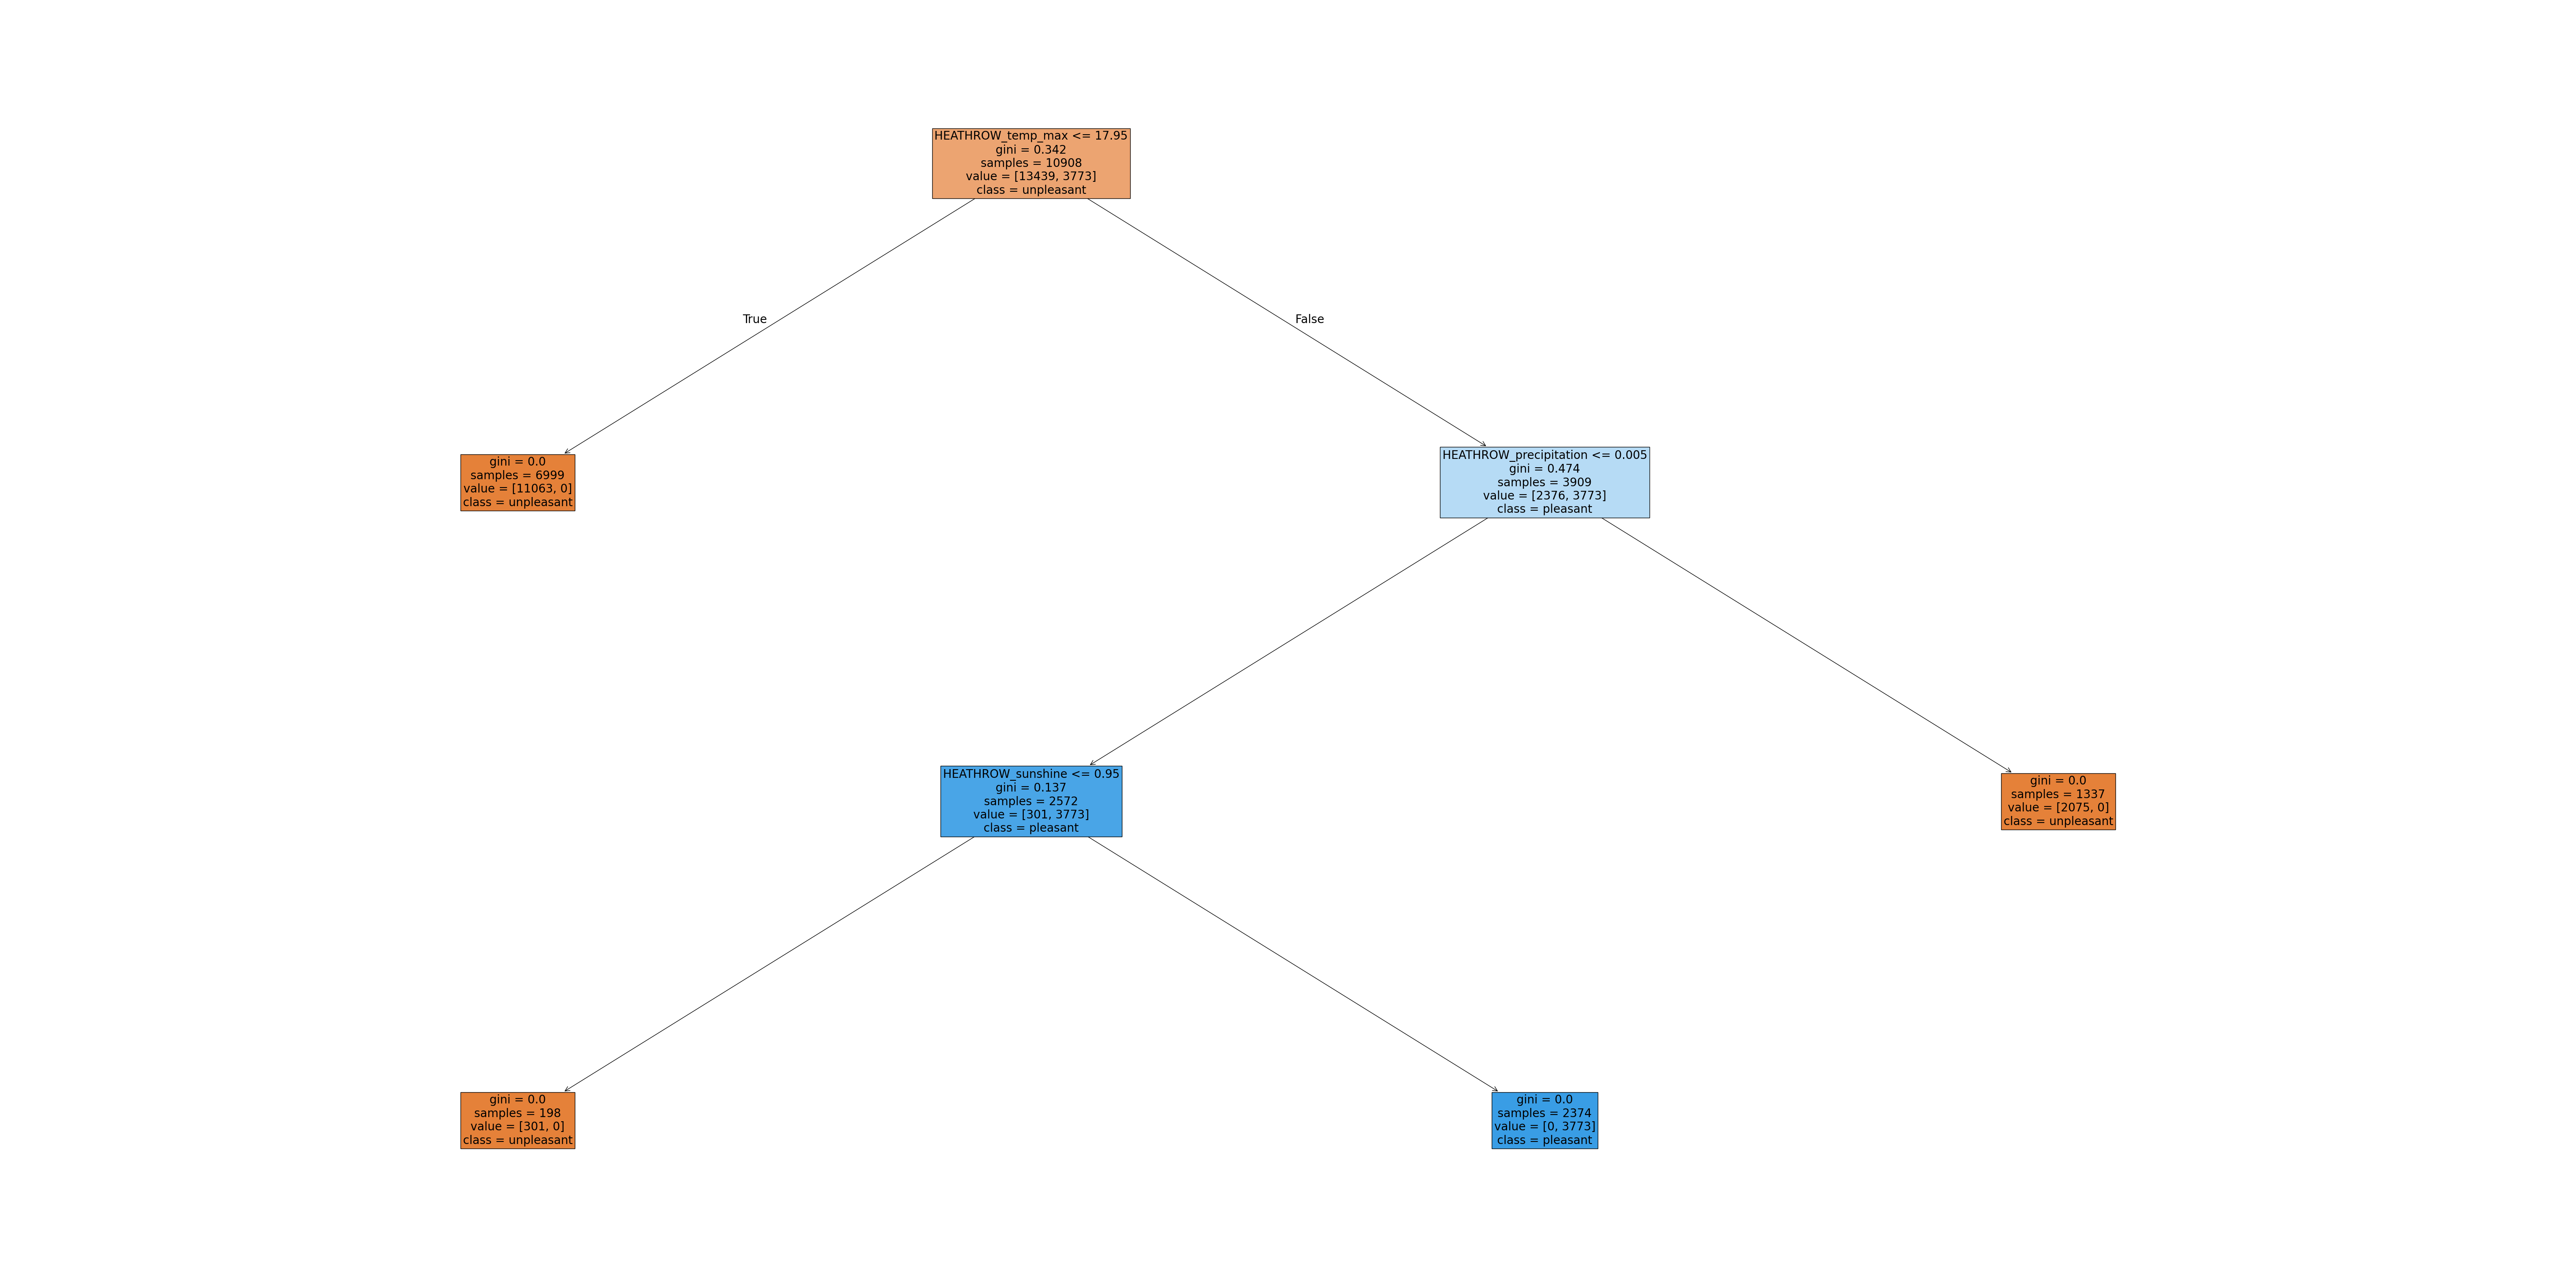

In [40]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_heathrow.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [41]:
fig.savefig(os.path.join(path, '04 Visualizations', 'optimized_random_forest_Heathrow.png'),bbox_inches='tight')

## 7. Uncovering Feature Importances

In [43]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([1.99924319e-03, 7.72734211e-03, 4.25051970e-03, 2.54528968e-02,
       3.68841348e-01, 9.08167364e-02, 6.69227435e-02, 1.51035763e-04,
       4.33838134e-01])

In [44]:
# Create a list of weather features

wx_list = [feature.replace('HEATHROW_', '') for feature in heathrow_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [45]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.001999
humidity            0.007727
pressure            0.004251
global_radiation    0.025453
precipitation       0.368841
sunshine            0.090817
temp_mean           0.066923
temp_min            0.000151
temp_max            0.433838
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


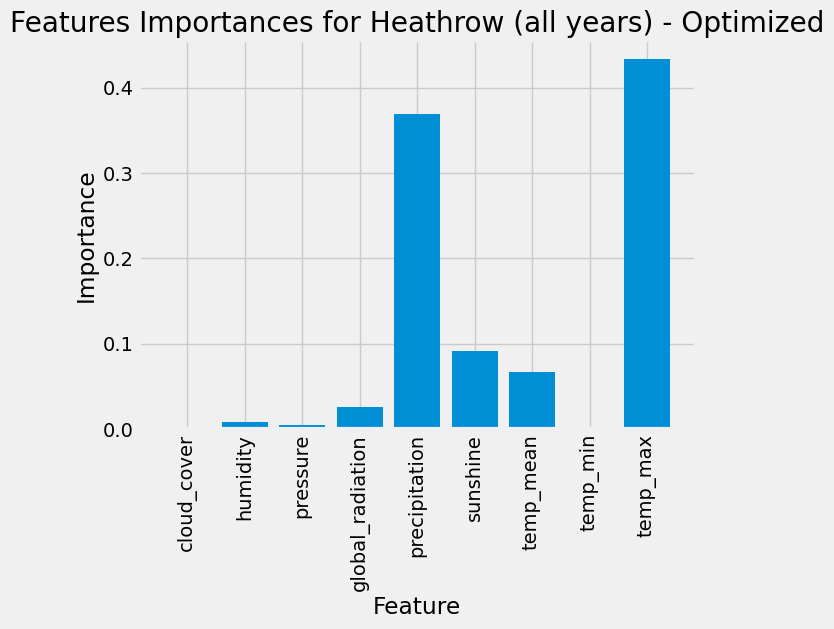

In [46]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow (all years) - Optimized');

plt.savefig(os.path.join(path, '04 Visualizations', 'Heathrow_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()